In [47]:
!ls /home/randomdude/Downloads/anomaly_dataset/realTraffic/realTraffic

occupancy_6005.csv   speed_6005.csv  speed_t4013.csv	 TravelTime_451.csv
occupancy_t4013.csv  speed_7578.csv  TravelTime_387.csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mstats

plt.rcParams['figure.figsize'] = [20.0, 5.0]

In [48]:
import pandas as pd

dt = pd.read_csv("/home/randomdude/Downloads/anomaly_dataset/realTraffic/realTraffic/speed_t4013.csv")

<AxesSubplot:>

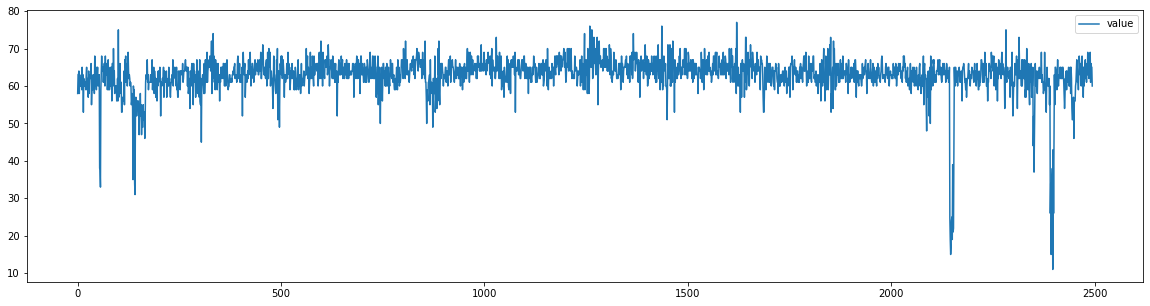

In [49]:
dt.plot()

<AxesSubplot:>

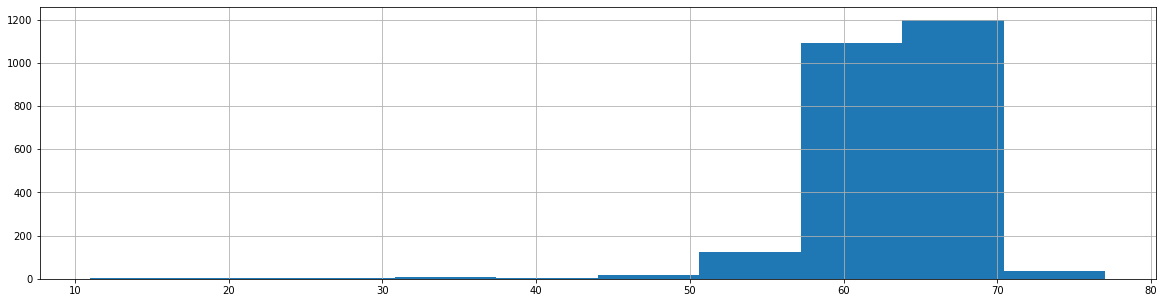

In [51]:
dt['value'].hist()


In [52]:
dt['timestamp'] = np.arange(len(dt))

In [53]:
nbrs = NearestNeighbors(n_neighbors = 5)

In [54]:
# distances and indexes of k-neaighbors from model outputs
nbrs.fit(dt)

NearestNeighbors()

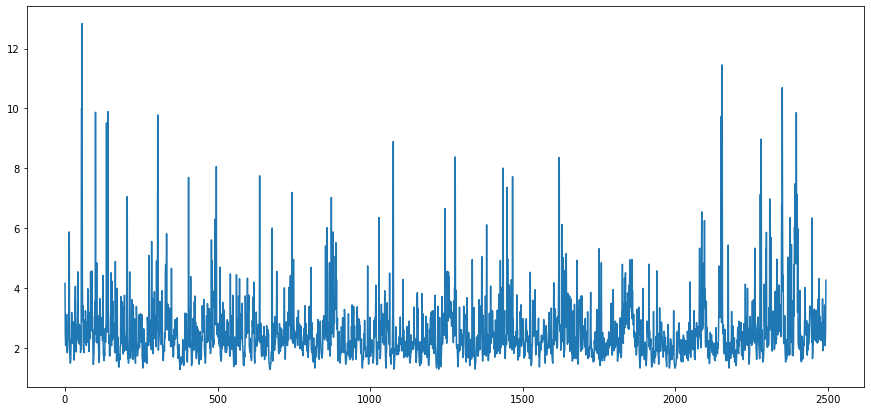

In [55]:
distances, indexes = nbrs.kneighbors(dt)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [56]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean



0       4.161748
1       2.467017
2       2.082843
3       2.177270
4       3.106600
          ...   
2490    3.438097
2491    2.083622
2492    2.177270
2493    2.647214
2494    4.263099
Length: 2495, dtype: float64

In [57]:
distances_mean.describe()

count    2495.000000
mean        2.484608
std         1.061661
min         1.282843
25%         1.895742
50%         2.216852
75%         2.719807
max        12.832408
dtype: float64

In [60]:
th = 5.0
outlier_index = np.where(distances_mean > th)
outlier_values = dt.iloc[outlier_index]
outlier_values




,timestamp,value
14,14,53
54,54,38
55,55,38
56,56,33
100,100,75
...,...,...
2398,2398,43
2399,2399,26
2400,2400,47
2402,2402,55


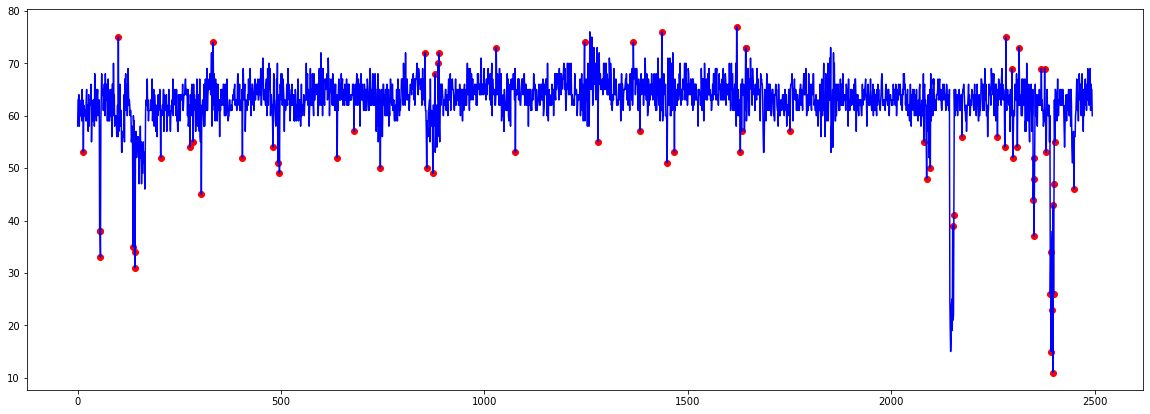

In [61]:
# plot data
plt.figure(figsize=(20, 7))
plt.plot(dt["timestamp"], dt["value"], color = "b")
# plot outlier values
plt.scatter(outlier_values["timestamp"], outlier_values["value"], color = "r")